# Intrusion Detection System Using Machine Learning Models

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
with open("C:/Users/hp/OneDrive/Desktop/kddcup.names.txt", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [6]:
# Append columns to the dataset and add ‘target’ column.
cols ="""duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins, 
logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,
is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,
srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"""

columns =[]
for c in cols.split(','):
    if(c.strip()):
        columns.append(c.strip())
columns.append('target')
print(len(columns))

42


In [7]:
with open("C:/Users/hp/OneDrive/Desktop/training_attack_types.txt", 'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [8]:
# Create dictionary of training_attack_types 

attacks_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}

In [9]:
attacks_types

{'normal': 'normal',
 'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'multihop': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'rootkit': 'u2r',
 'satan': 'probe',
 'smurf': 'dos',
 'spy': 'r2l',
 'teardrop': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l'}

In [10]:
attacks_types

{'normal': 'normal',
 'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'multihop': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'rootkit': 'u2r',
 'satan': 'probe',
 'smurf': 'dos',
 'spy': 'r2l',
 'teardrop': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l'}

Loading Dataset

In [11]:
path = "C:/Users/hp/OneDrive/Desktop/kddcup.data_10_percent.txt"
kdd_df = pd.read_csv(path, names = columns)

Making Dataframe

In [12]:
kdd_df['Attack_Type'] = kdd_df.target.apply(lambda r:attacks_types[r[:-1]])
kdd_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [13]:
kdd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [14]:
kdd_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Preprocessing

In [15]:
kdd_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [16]:
# Finding categorical features
numerical_cols = kdd_df._get_numeric_data().columns
  
categorical_cols = list(set(kdd_df.columns)-set(numerical_cols))
categorical_cols.remove('target')
categorical_cols.remove('Attack_Type')
  
categorical_cols

['protocol_type', 'service', 'flag']

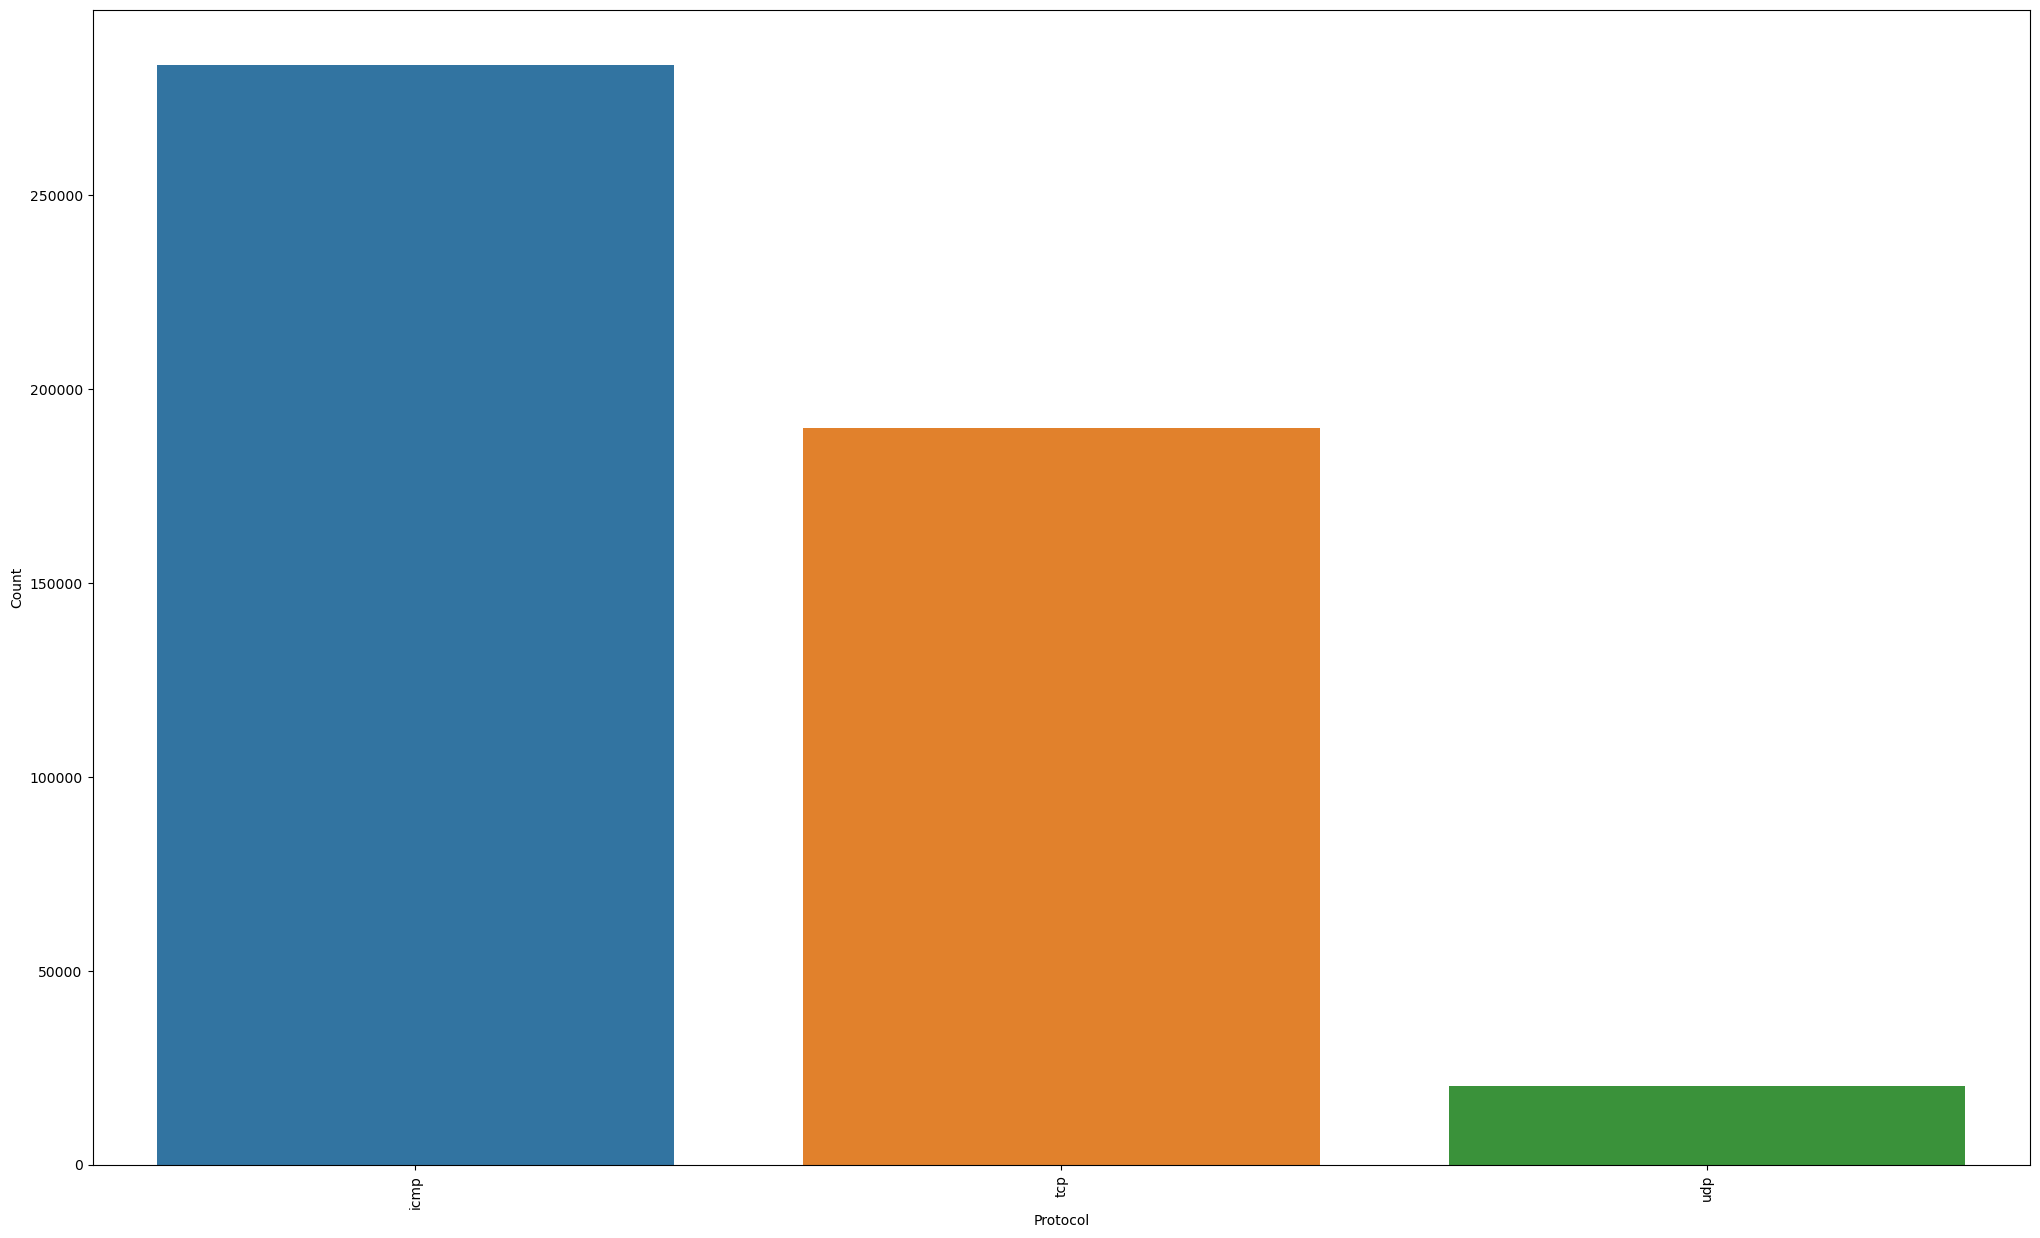

In [17]:
df2 = pd.DataFrame(columns = ['Protocol'])
df2['Protocol']=[each for each in kdd_df.protocol_type.unique()]
df2['Count']=[len(kdd_df[kdd_df.protocol_type==each]) for each in df2.Protocol]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.Protocol.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()

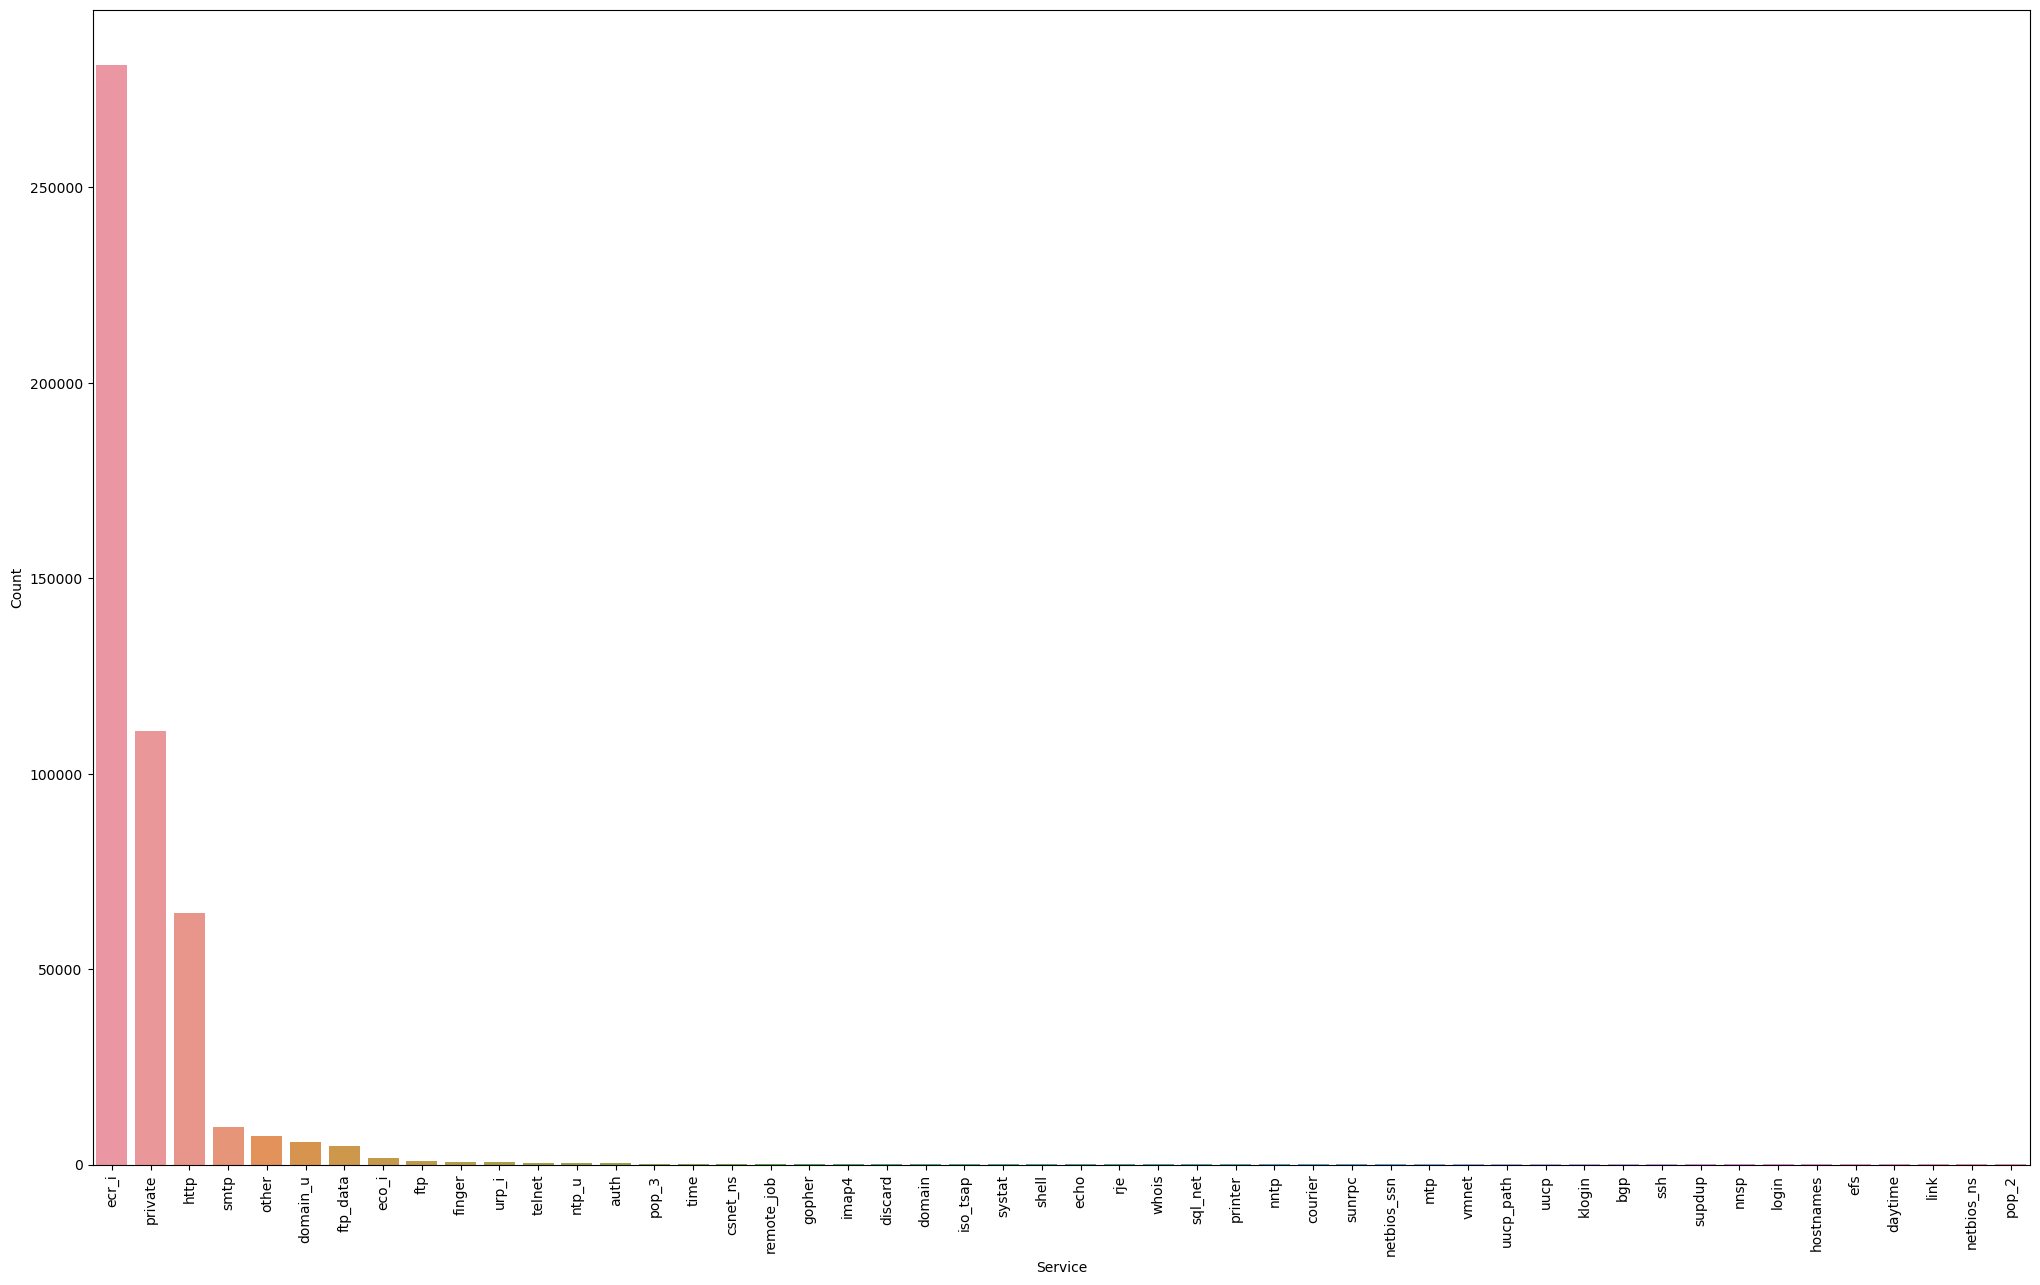

In [18]:
df3 = pd.DataFrame(columns = ['Service'])
df3['Service']=[each for each in kdd_df.service.unique()]
df3['Count']=[len(kdd_df[kdd_df.service==each]) for each in df3.Service]
df3=df3.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df3.Service.head(50), y=df3.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Service')
plt.ylabel('Count')
plt.show()

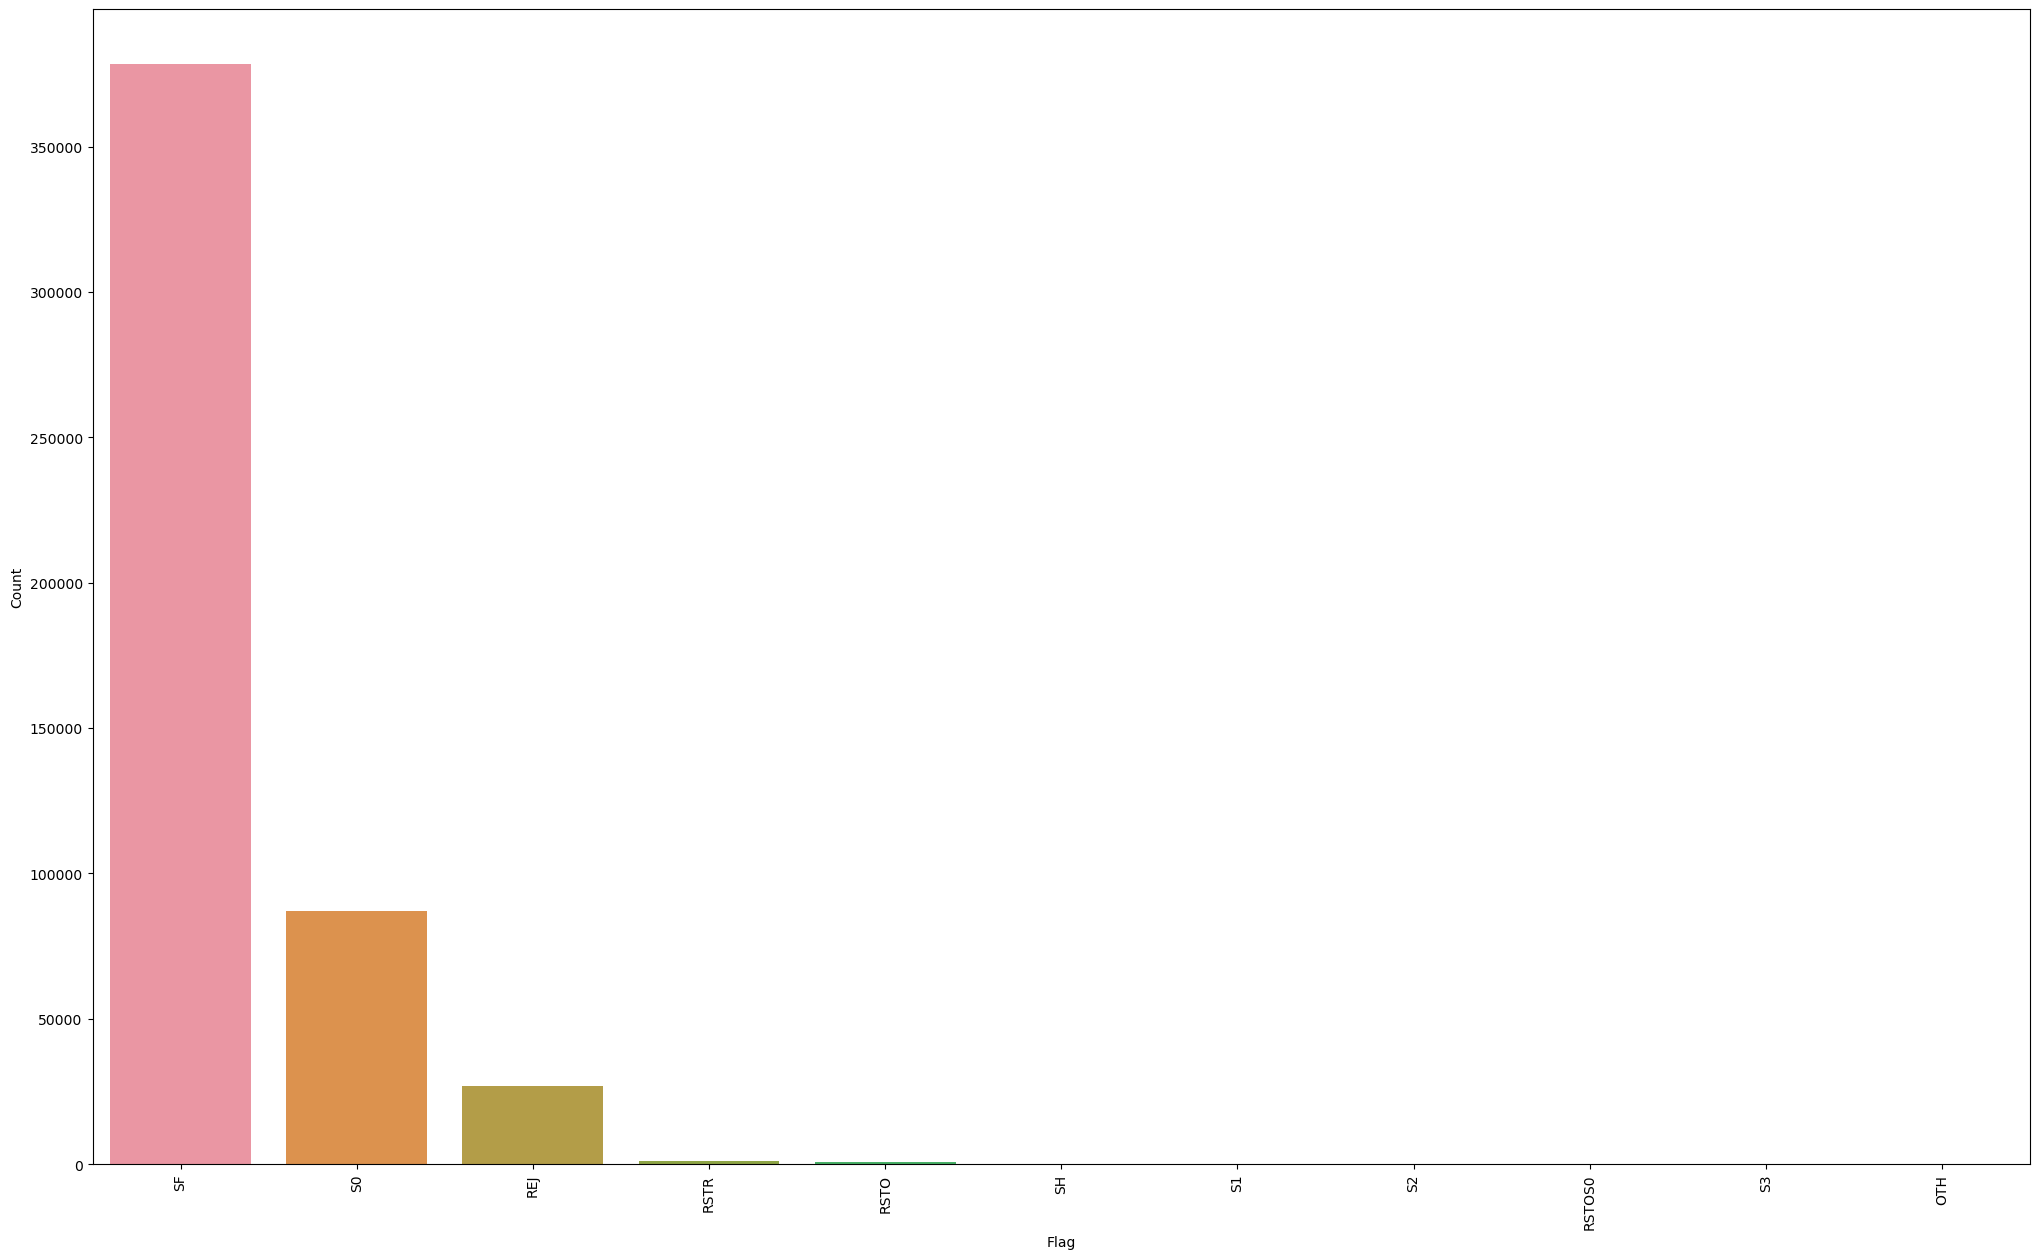

In [19]:
df4 = pd.DataFrame(columns = ['Flag'])
df4['Flag']=[each for each in kdd_df.flag.unique()]
df4['Count']=[len(kdd_df[kdd_df.flag==each]) for each in df4.Flag]
df4=df4.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df4.Flag.head(50), y=df4.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Flag')
plt.ylabel('Count')
plt.show()

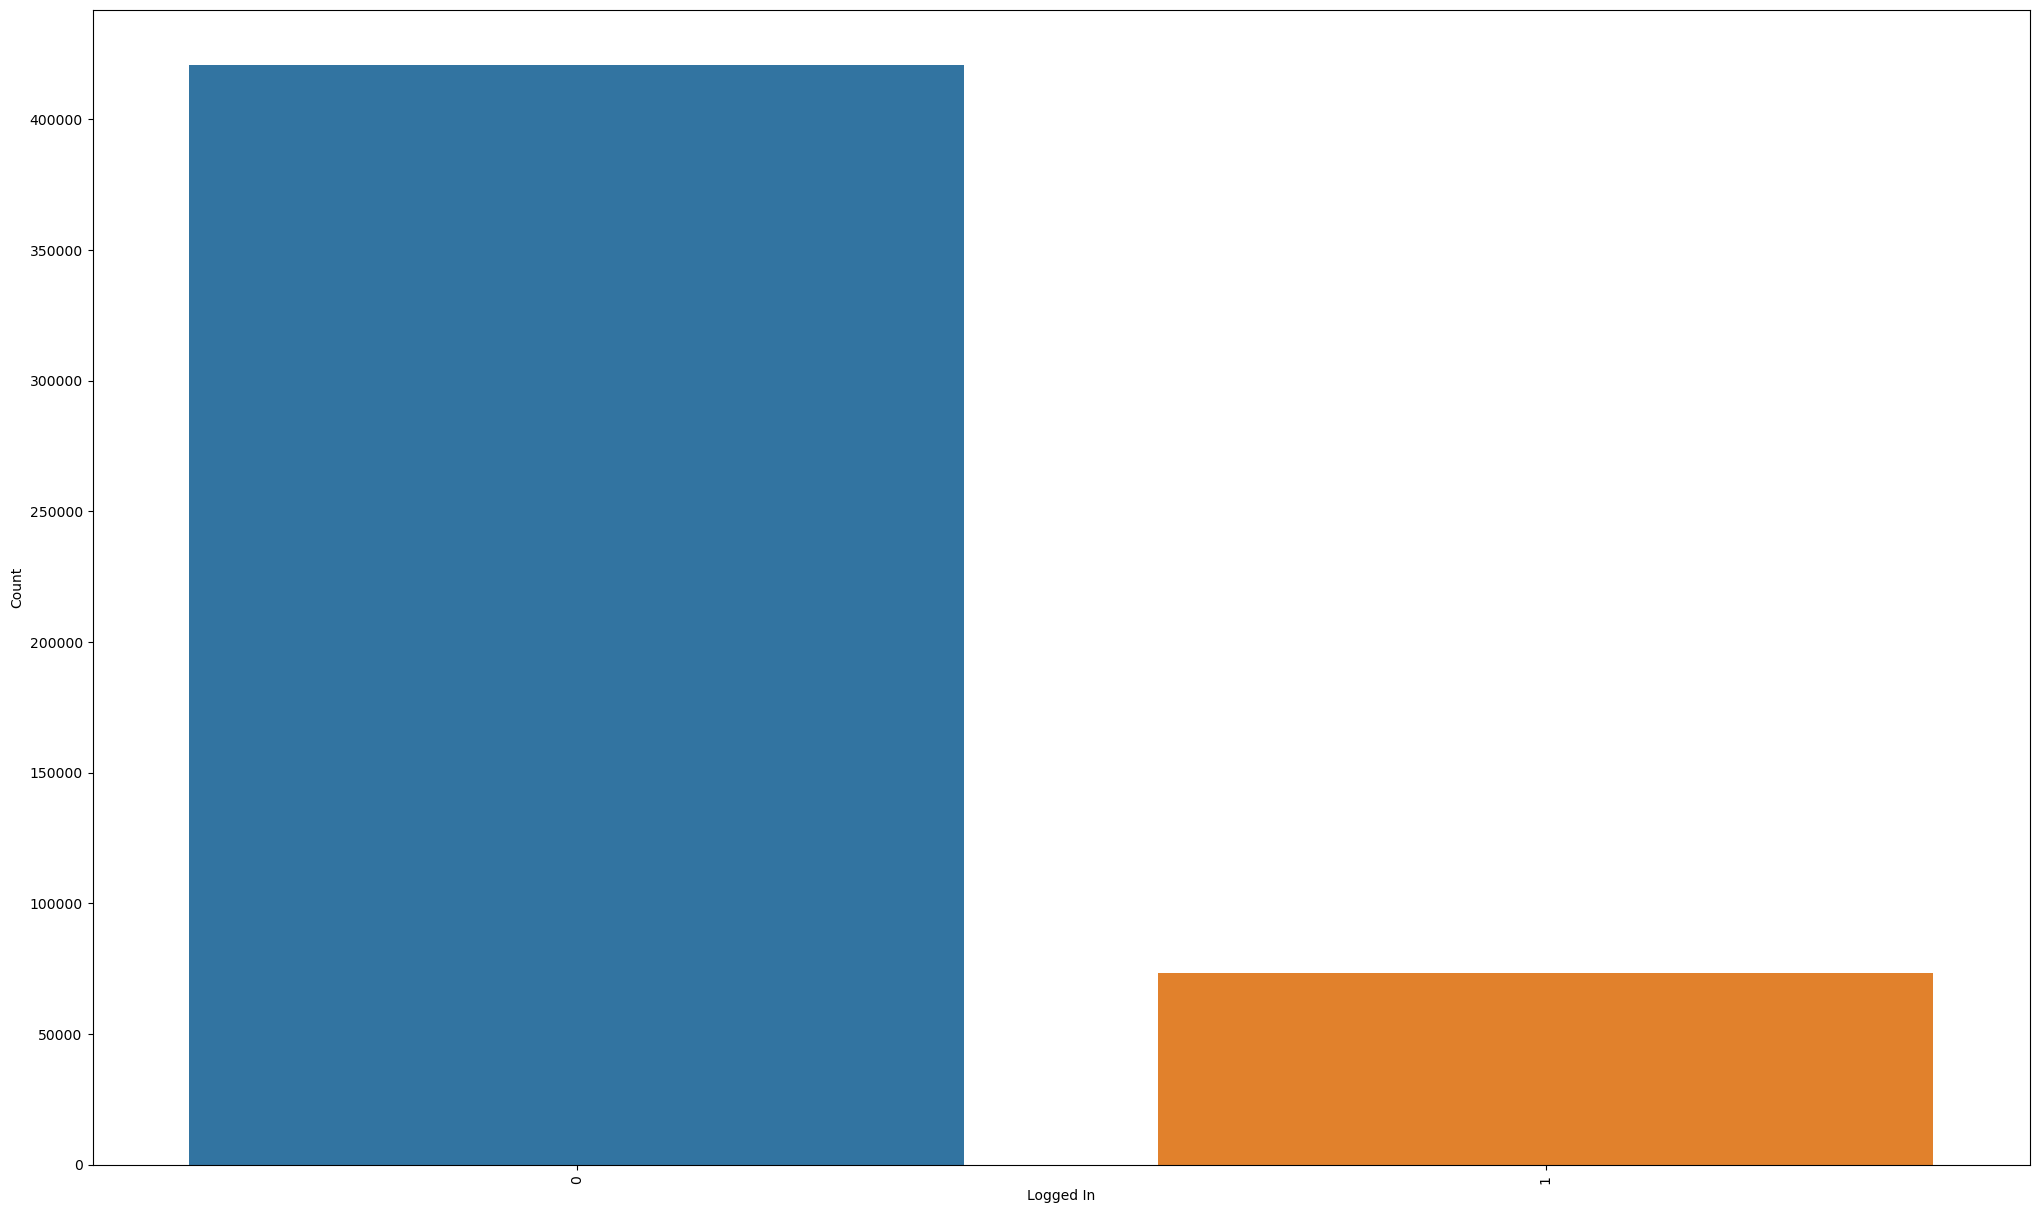

In [20]:
df5 = pd.DataFrame(columns = ['Logged_In'])
df5['Logged_In']=[each for each in kdd_df.logged_in.unique()]
df5['Count']=[len(kdd_df[kdd_df.logged_in==each]) for each in df5.Logged_In]
df5=df5.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df5.Logged_In.head(50), y=df5.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Logged In')
plt.ylabel('Count')
plt.show()

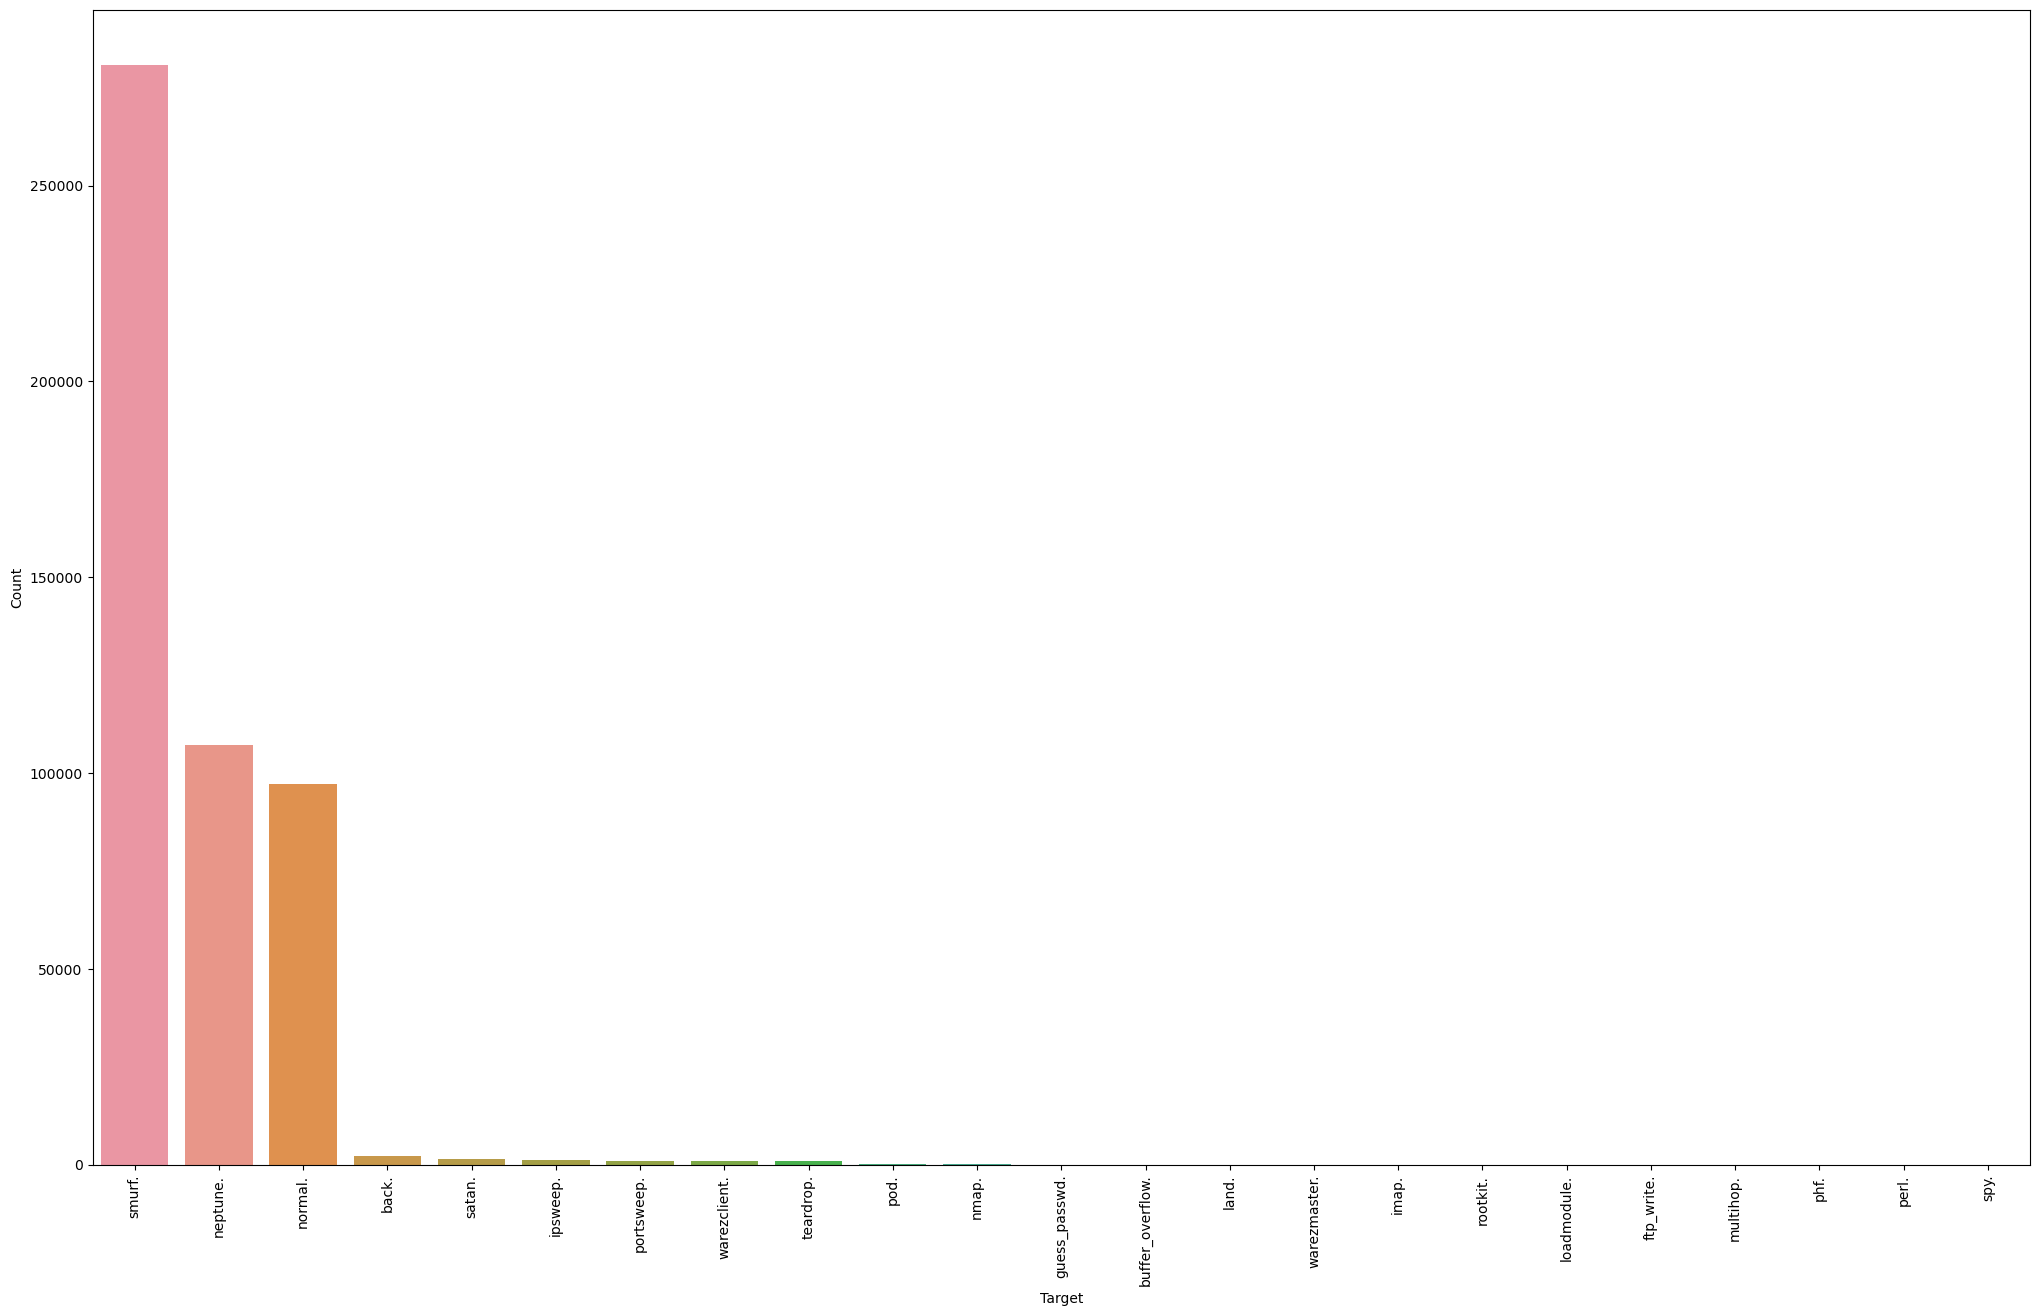

In [21]:
df6 = pd.DataFrame(columns = ['Target'])
df6['Target']=[each for each in kdd_df.target.unique()]
df6['Count']=[len(kdd_df[kdd_df.target==each]) for each in df6.Target]
df6=df6.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df6.Target.head(50), y=df6.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

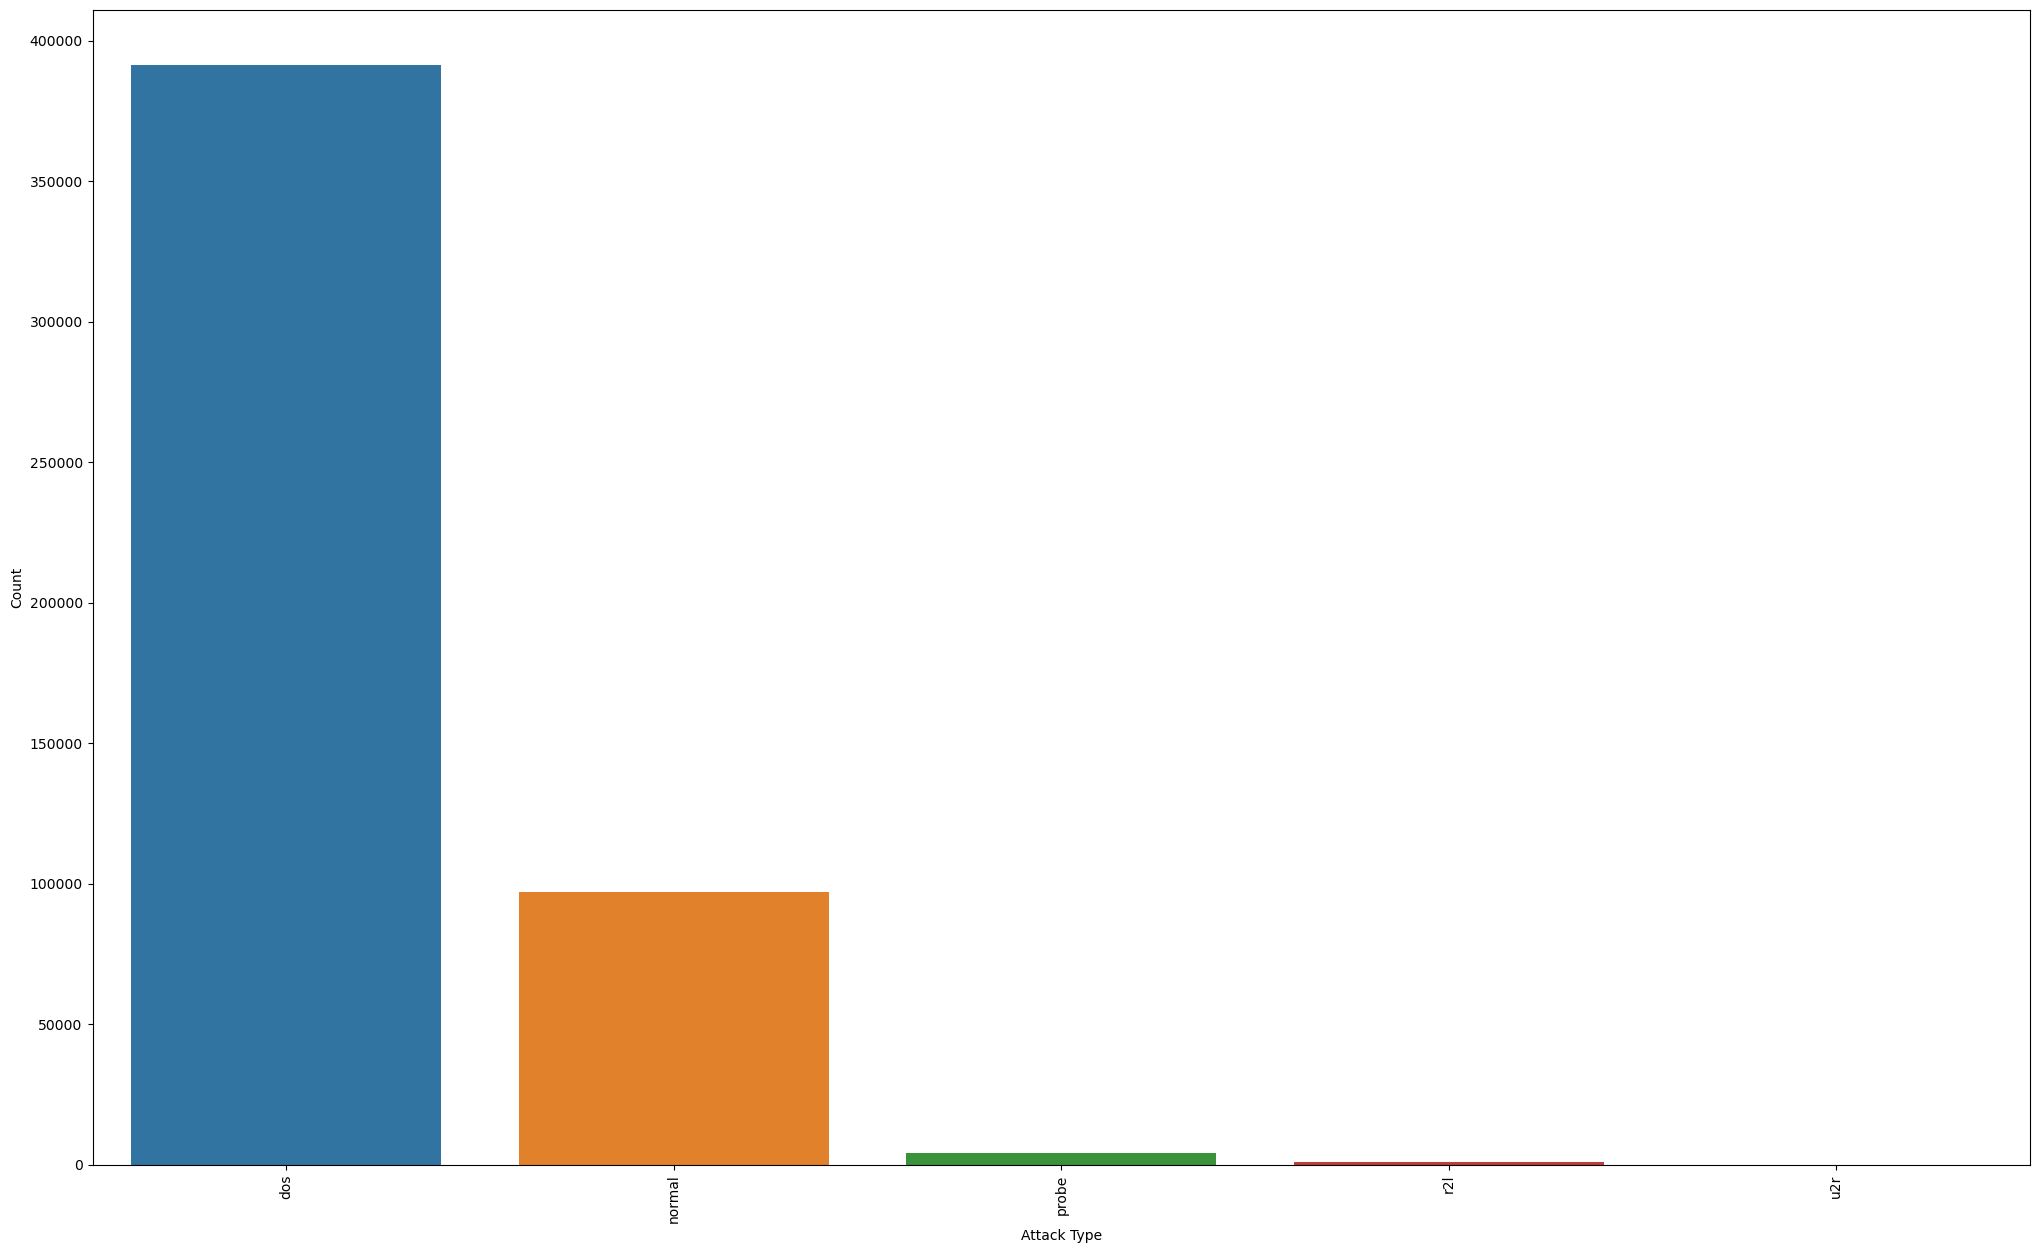

In [22]:
df7 = pd.DataFrame(columns = ['Attack_Type'])
df7['Attack_Type']=[each for each in kdd_df.Attack_Type.unique()]
df7['Count']=[len(kdd_df[kdd_df.Attack_Type==each]) for each in df7.Attack_Type]
df7=df7.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df7.Attack_Type.head(50), y=df7.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_17388\1744424849.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  kdd_df = kdd_df.dropna('columns') # Drop columns with NaN
C:\Users\hp\AppData\Local\Temp\ipykernel_17388\1744424849.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = kdd_df.corr()


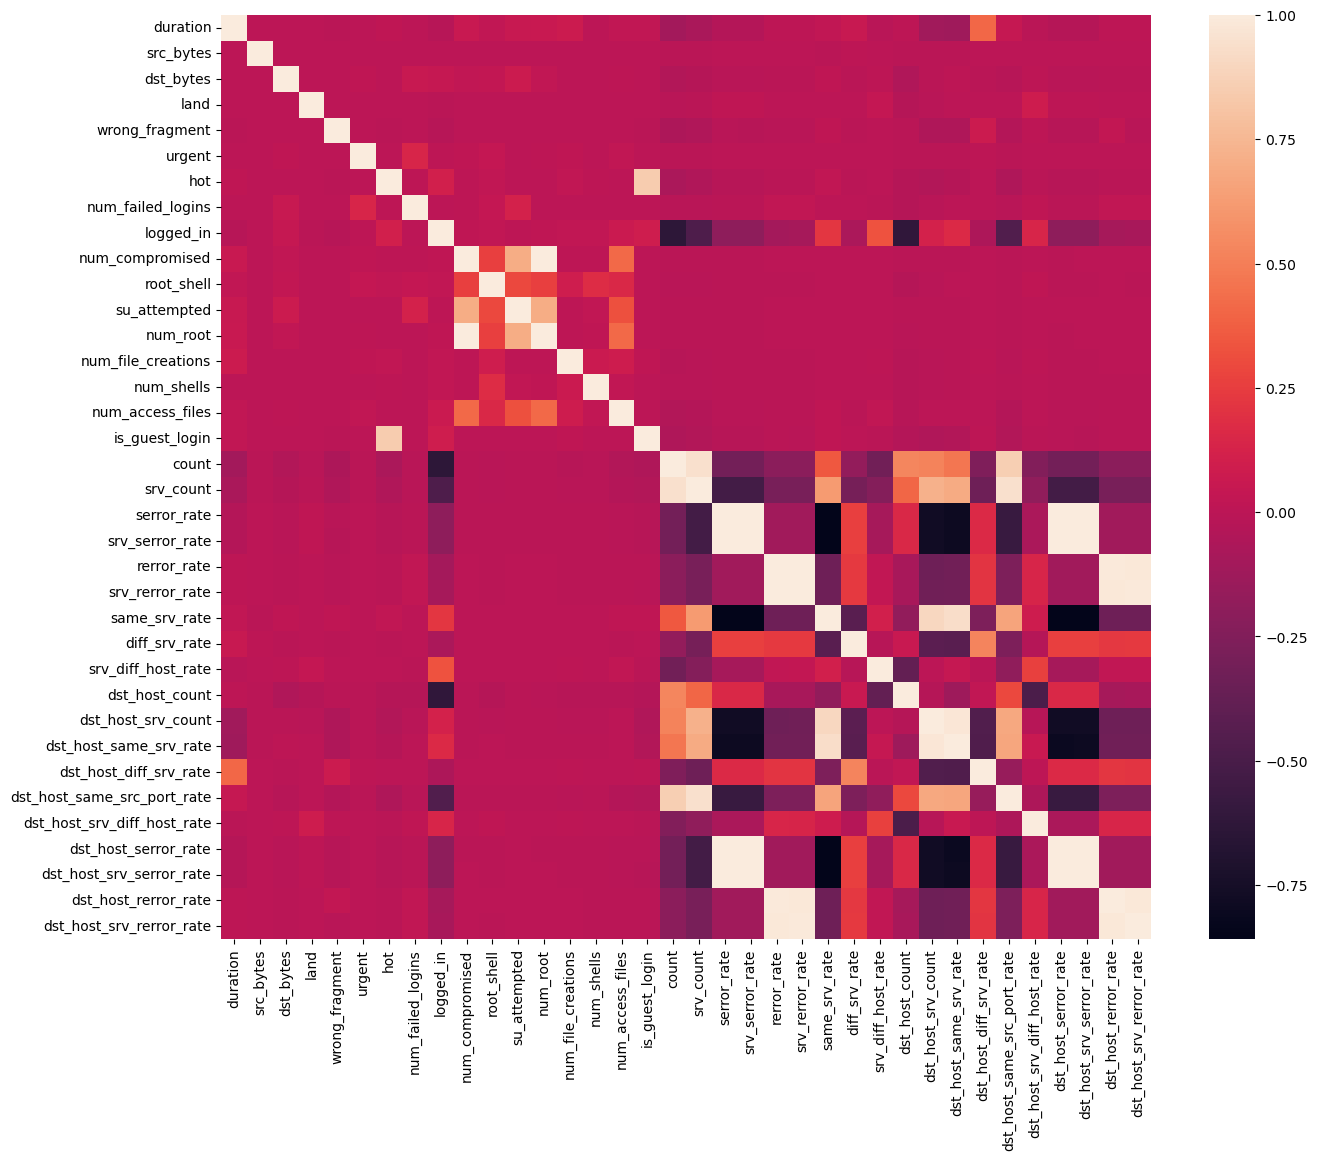

In [23]:
# Data Correlation – Find the highly correlated variables using heatmap and ignore them for analysis.

kdd_df = kdd_df.dropna('columns') # Drop columns with NaN

kdd_df = kdd_df[[col for col in kdd_df if kdd_df[col].nunique() > 1]] # Keep columns where there are more than 1 unique values

corr = kdd_df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [27]:
print(kdd_df['num_root'].corr(kdd_df['num_compromised']))
print(kdd_df['srv_serror_rate'].corr(kdd_df['serror_rate']))
print(kdd_df['srv_count'].corr(kdd_df['count']))
print(kdd_df['srv_rerror_rate'].corr(kdd_df['rerror_rate']))
print(kdd_df['dst_host_same_srv_rate'].corr(kdd_df['dst_host_srv_count']))
print(kdd_df['dst_host_srv_serror_rate'].corr(kdd_df['dst_host_serror_rate']))
print(kdd_df['dst_host_srv_rerror_rate'].corr(kdd_df['dst_host_rerror_rate']))
print(kdd_df['dst_host_same_srv_rate'].corr(kdd_df['same_srv_rate']))
print(kdd_df['dst_host_srv_count'].corr(kdd_df['same_srv_rate']))
print(kdd_df['dst_host_same_src_port_rate'].corr(kdd_df['srv_count']))
print(kdd_df['dst_host_serror_rate'].corr(kdd_df['serror_rate']))
print(kdd_df['dst_host_serror_rate'].corr(kdd_df['srv_serror_rate']))
print(kdd_df['dst_host_srv_serror_rate'].corr(kdd_df['serror_rate']))
print(kdd_df['dst_host_srv_serror_rate'].corr(kdd_df['srv_serror_rate']))
print(kdd_df['dst_host_rerror_rate'].corr(kdd_df['rerror_rate']))
print(kdd_df['dst_host_rerror_rate'].corr(kdd_df['srv_rerror_rate']))
print(kdd_df['dst_host_srv_rerror_rate'].corr(kdd_df['srv_rerror_rate']))
print(kdd_df['dst_host_srv_rerror_rate'].corr(kdd_df['rerror_rate']))
print(kdd_df['dst_host_srv_rerror_rate'].corr(kdd_df['srv_rerror_rate']))

0.9938277978750971
0.9983615072725553
0.9436670688873966
0.9947309539823285
0.973685457296524
0.9981559173370796
0.9848038371108135
0.9278080342693468
0.8989546630321118
0.9449263676771811
0.9986729680107838
0.9978353003731405
0.9978492485672809
0.9993041091845912
0.9869947924956788
0.9821663427309738
0.9865705438849232
0.9851995540753726
0.9865705438849232


In [28]:
# Drop highly correlated variables as these should be ignored for learning
kdd_df.drop('num_root',axis = 1,inplace = True)
kdd_df.drop('srv_serror_rate',axis = 1,inplace = True)
kdd_df.drop('srv_rerror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_serror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

# Drop 'service' since provides no useful information for learning
kdd_df.drop('service',axis = 1, inplace=True)

In [29]:
# Feature Mapping
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
kdd_df['protocol_type'] = kdd_df['protocol_type'].map(pmap)

#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
kdd_df['flag'] = kdd_df['flag'].map(fmap)

kdd_df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


Training and Testing

In [30]:
kdd_df = kdd_df.drop(['target', ], axis = 1)
print(kdd_df.shape)


y = kdd_df[['Attack_Type']]
x = kdd_df.drop(['Attack_Type', ], axis = 1)

min_max_sc = MinMaxScaler()
x = min_max_sc.fit_transform(x)

(494021, 31)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(395216, 30) (98805, 30)
(395216, 1) (98805, 1)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm

In [29]:
from sklearn.svm import SVC
svc = SVC(gamma = 'scale')

# Training SVC
start_time = time.time()
svc.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

# Testing SVC
start_time = time.time()
y_test_pred = svc.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)
      
# SVC test and train scores
print("Train score is:", svc.score(x_train, y_train))
print("Test score is:", svc.score(x_test, y_test))

Training time:  1853.549150466919
Testing time:  303.9342007637024
Train score is: 0.9987804137484312
Test score is: 0.9987348818379637


In [32]:
dtc = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)

# Training DTC
start_time = time.time()
dtc.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

# Testing DTC
start_time = time.time()
y_test_pred = dtc.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

# DTC test and train scores
print("Train score is:", dtc.score(x_train, y_train))
print("Test score is:", dtc.score(x_test, y_test))


Training time:  1.1936743259429932
Testing time:  0.06192731857299805
Train score is: 0.9905747743006356
Test score is: 0.9905470370932645


In [34]:
gnb = GaussianNB()

# Training GNB
start_time = time.time()
gnb.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

#Testing GNB
start_time = time.time()
y_test_pred = gnb.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

# GNB test and train scores
print("Train score is:", gnb.score(x_train, y_train))
print("Test score is:", gnb.score(x_test, y_test))

Training time:  0.49755239486694336
Testing time:  0.5799195766448975
Train score is: 0.8812295048783451
Test score is: 0.8810181670968068


In [36]:
rfst = RandomForestClassifier(n_estimators = 30)

# Training RF
start_time = time.time()
rfst.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

# Testing RF
start_time = time.time()
y_test_pred = rfst.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

# Rf test and train scores
print("Train score is:", rfst.score(x_train, y_train))
print("Test score is:", rfst.score(x_test, y_test))

Training time:  10.827370643615723
Testing time:  0.9014520645141602
Train score is: 0.9999797579045383
Test score is: 0.9996356459693335


In [37]:
lr = LogisticRegression(max_iter = 1200000)

# Training LR
start_time = time.time()
lr.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

# Testing LR
start_time = time.time()
y_test_pred = lr.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

# LR test and train scores
print("Train score is:", lr.score(x_train, y_train))
print("Test score is:", lr.score(x_test, y_test))

Training time:  26.306286811828613
Testing time:  0.0493466854095459
Train score is: 0.9940918383871098
Test score is: 0.9941399726734477


In [40]:
gbc = GradientBoostingClassifier(random_state = 0)

# Training GBC
start_time = time.time()
gbc.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

# Testing GBC
start_time = time.time()
y_test_pred = gbc.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

# SVC test and train scores
print("Train score is:", gbc.score(x_train, y_train))
print("Test score is:", gbc.score(x_test, y_test))

Training time:  384.2205708026886
Testing time:  2.5429580211639404
Train score is: 0.9991144083235497
Test score is: 0.9988360912909265


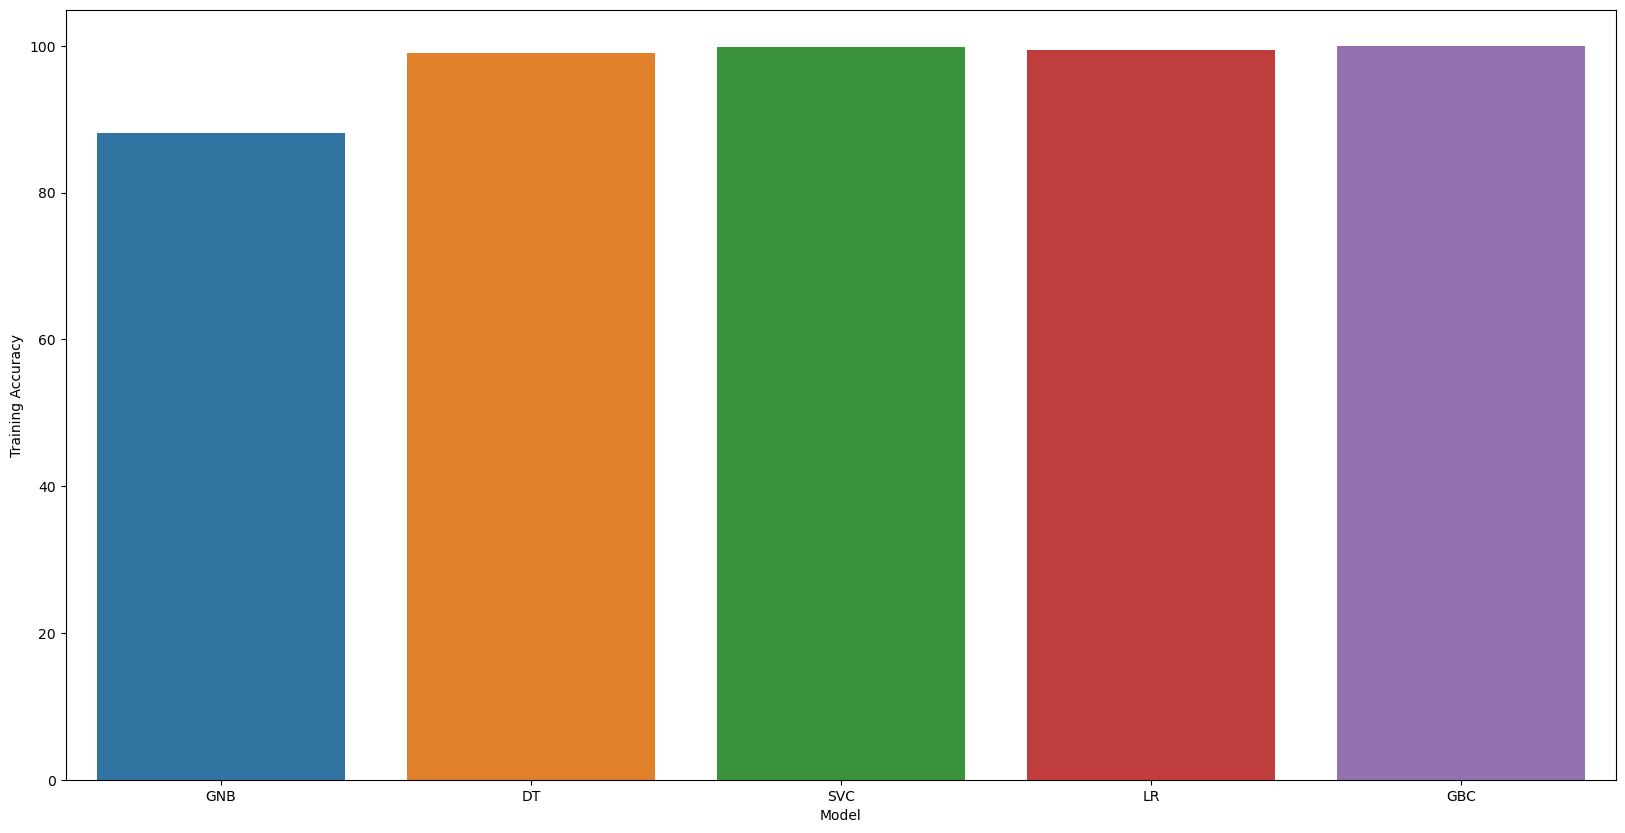

In [41]:
names = ['GNB', 'DT', 'SVC', 'LR', 'GBC']
values = [88.122, 99.057,99.878, 99.409, 99.911]

plt.figure(figsize=(20,10))
sns.barplot(x=names, y=values)
plt.xticks(rotation= 360)
plt.xlabel('Model')
plt.ylabel('Training Accuracy')
plt.show()

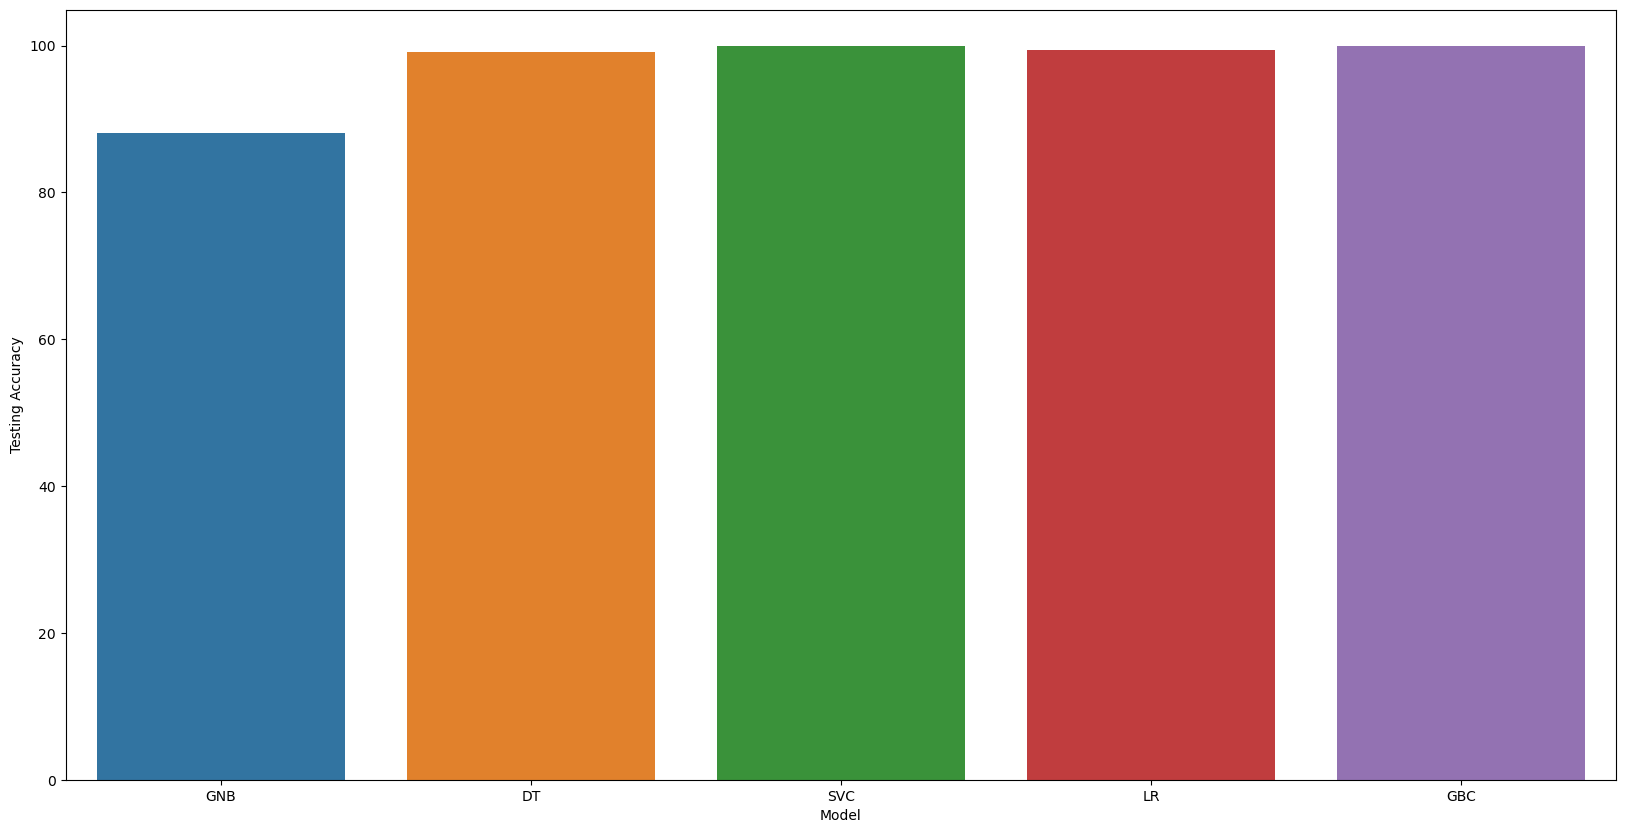

In [42]:
names = ['GNB', 'DT', 'SVC', 'LR', 'GBC']
values = [88.101, 99.054,99.873, 99.413, 99.883]

plt.figure(figsize=(20,10))
sns.barplot(x=names, y=values)
plt.xticks(rotation= 360)
plt.xlabel('Model')
plt.ylabel('Testing Accuracy')
plt.show()

# CONCLUSION

Among the algorithms tested, SVM achieved the highest accuracy but slower Training and Testing Time.